In [1]:
# Import necessary libraries for analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [7]:
import pandas as pd
try:
    df = pd.read_csv('/Users/krishshah1219icloud.com/Desktop/ML-Task/Mall_Customers.csv')
    print("Dataset 'Mall_Customers.csv' loaded successfully!")
except FileNotFoundError:
    print("Error: 'Mall_Customers.csv' not found. Please download it from the Kaggle link.")
    exit()

Dataset 'Mall_Customers.csv' loaded successfully!


Exploratory Data Analysis (EDA)

In [8]:
print(df.head())

df.info()

print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
       CustomerID         Age  Annual Income (k$)  Spend

Visualizing Feature Distributions



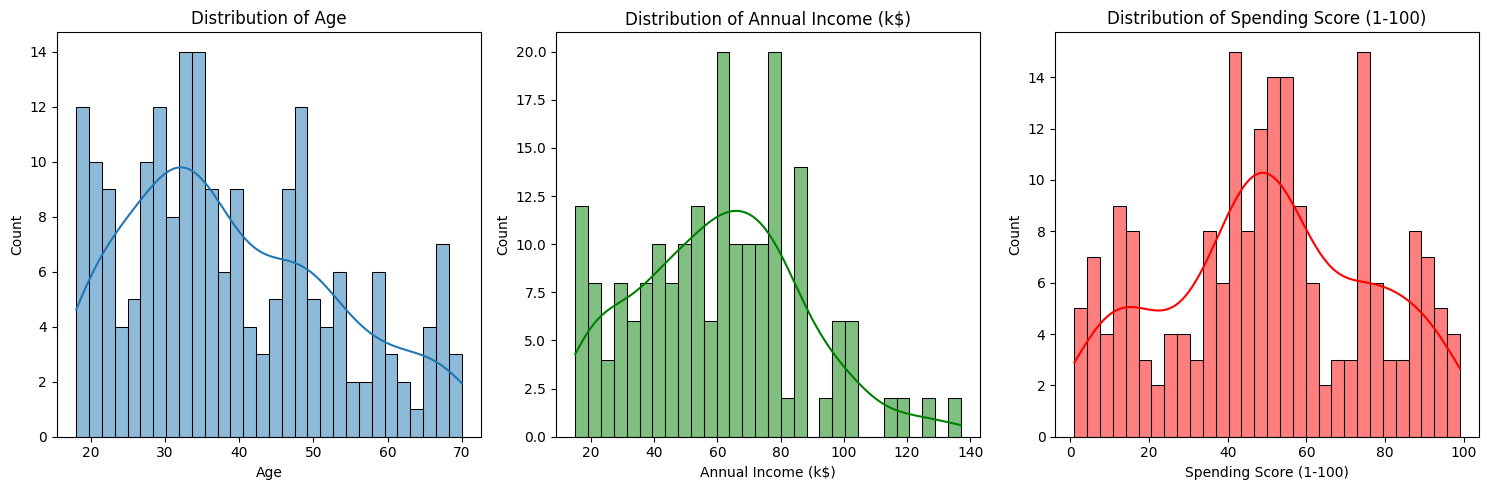

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))

# Plot distribution of Age
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')

# Plot distribution of Annual Income
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=30, color='green')
plt.title('Distribution of Annual Income (k$)')

# Plot distribution of Spending Score
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=30, color='red')
plt.title('Distribution of Spending Score (1-100)')

plt.tight_layout()
plt.show()

Analyzing Feature Relationships

A scatter plot of Annual Income vs. Spending Score is created. This visualization is crucial as it reveals natural groupings or clusters within the data, suggesting that K-means is a suitable algorithm for this problem.

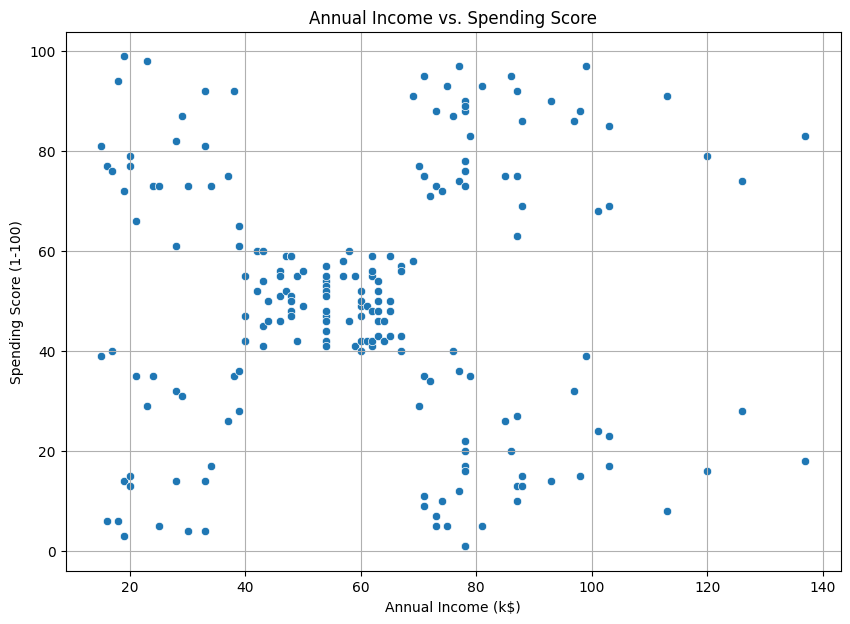

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs. Spending Score')
plt.grid(True)
plt.show()

Feature Selection and Optimal Cluster Determination



In [13]:
X = df.iloc[:, [3, 4]].values

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    # n_init=10 runs the algorithm 10 times with different starting centroids
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    # kmeans.inertia_ returns the WCSS value for that model
    wcss.append(kmeans.inertia_)

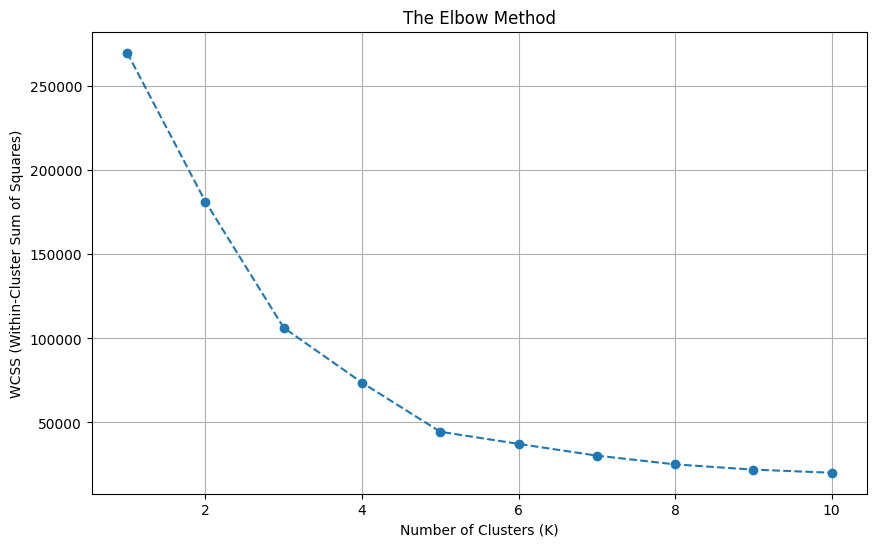

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

 Model Training and Visualization

In [17]:
X = df.iloc[:, [3, 4]].values

In [18]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)

# Fit the model and predict the cluster for each data point
y_kmeans = kmeans.fit_predict(X)

print("✅ Model training and prediction complete!")

✅ Model training and prediction complete!


Visualizing the Customer Segments

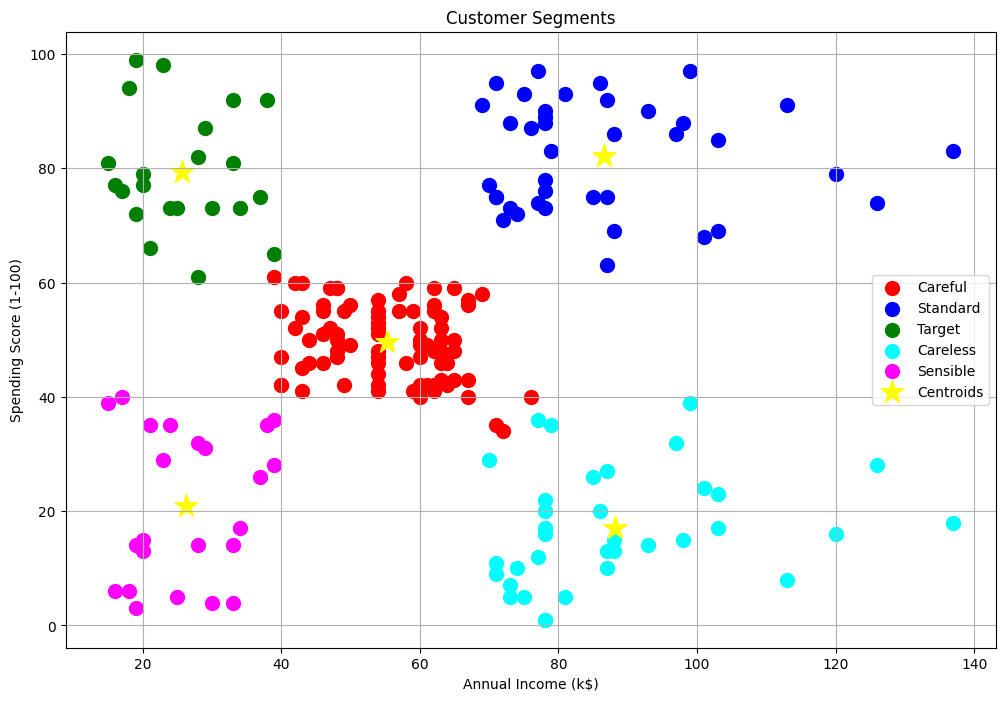

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# --- 3. Visualize the Customer Clusters ---
plt.figure(figsize=(12, 8))

# Scatter plot for each of the 5 clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Sensible')

# Plot the centroids of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='*', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

Interpreting the Customer Segments:

The scatter plot beautifully visualizes the five distinct customer groups our algorithm has identified. Now, let's turn this data into actionable business insights by creating personas for each segment.

* Cluster 1 (Red): Careful
    - Characteristics: These customers have a high annual income but a low spending score.

    - Marketing Insight: They are cautious with their money despite earning a lot. Marketing to this group should focus on quality, durability, and long-term value. Premium products with clear benefits, rather than flashy discounts, will appeal to them.

* Cluster 2 (Blue): Standard

    - Characteristics: This is the largest group, with an average annual income and an average spending score.

    - Marketing Insight: These are the typical mall customers. They are a reliable source of revenue and will respond well to standard marketing strategies, seasonal promotions, and general loyalty programs.

* Cluster 3 (Green): Target (VIPs)

    - Characteristics: This is the dream customer group, with a high annual income and a high spending score.

    - Marketing Insight: This segment is the most profitable. They should be treated as VIPs. Target them with exclusive offers, early access to new collections, and premium loyalty rewards to ensure they remain satisfied and continue spending.

* Cluster 4 (Cyan): Careless (Spenders)

    - Characteristics: These customers have a low annual income but a high spending score.

    - Marketing Insight: This group loves to spend but may not have high disposable income. They are highly susceptible to promotions, sales, and credit-based offers like "buy now, pay later."

* Cluster 5 (Magenta): Sensible

    - Characteristics: This group has a low annual income and a low spending score.

    - Marketing Insight: These customers are highly budget-conscious and careful with their spending. The best way to attract them is through discounts, clearance sales, and promotions that emphasize value for money.